# Experimento 02 – Produto Escalar

### Grupo:

<table align="left" style=font-size:15px>
<thead>
  <tr>
    <th style="text-align:left;">Nome</th>
    <th style="text-align:left;">RA</th>
  </tr>
</thead>
<tbody>
  </tr>
    <tr>
    <td style="text-align:left;">Carlos Eduardo de Oliveira</td>
    <td>RA00297792</td>
  </tr>
  <tr>
    <td style="text-align:left;">Isaac Higuchi</td>
    <td>RA00306191</td>
  </tr>
  <tr>
    <td style="text-align:left;">Lucas Lopes Amorim</td>
    <td>RA00303799</td>
</tbody>
</table>

Assim  como  a  operação  de  multiplicação  matricial,  o  produto  escalar  é  operação matemática da álgebra linear amplamente utilizada na área de computação gráfica e jogos — ex: shaders são programas que utilizam o produto escalar para criar um efeito holográfico).  Normalmente  são  executados  pelas  placas  de  vídeo  ou  GPUs.  Nos  links abaixo  você  encontrará  as  informações  de  como  realizar  o  produto  escalar.  Fique  à 
vontade para consultar outros sites sobre o assunto durante o laboratório.
- https://www.matematica.pt/geogebra/11-ano-produto-escalar-vetores.php
- https://pt.khanacademy.org/math/multivariable-calculus/thinking-about-multivariable-function/786f2022:vectors-and-matrices/a/dot-products-mvc

Considerando a importância dessa operação matemática para a área de computação, 
cumpra as seguintes etapas propostas para o experimento:

**[Etapa  I:](#etapa-i)**  Implementar  um  programa  sequencial  na  linguagem  Python  que  calcule  o 
produto escalar entre dois vetores (u e v) de tamanho 100. Após a implementação faça os 
testes necessários.

**[Etapa  II:](#etapa-ii)**  Após  a  implementação  faça  uma  análise  do  desempenho  do  algoritmo 
implementado  e  calcule  o  tempo  para  a  computação  da  operação  considerando  dois 
vetores de tamanho 100. Inicialize com dados aleatórios antes do processamento.

**[Etapa  III:](#etapa-iii)**  Implementar  um  programa  paralelo  em  Python  usando  Numba  para  calcule 
produto escalar de dois vetores de tamanho 100. Utilize um conjunto de 4 threads para o 
processamento paralelo.

**[Etapa IV:](#etapa-iv)** Calcule o tempo para a computação do produto escalar considerando 2, 4 e 8 
threads. Inicialize com dados aleatórios antes do processamento.

**[Etapa V:](#etapa-v)** Calcule o SpeedUp da solução paralela proposta na etapa III. Indique no final 
do cálculo as informações de configuração do hardware utilizado (CPU, Clock, Cache, 
memória RAM e SO).

### Definições de Produto Escalar

#### Geométrica
$$
\mathbf {A} \cdot \mathbf {B} =\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|\cos \theta
$$

#### Algébrica
$$
\text{Sendo,} \newline
\mathbf {A} =\left(a_{1},a_{2},\cdots ,a_{n}\right) \newline
\mathbf {B} =\left(b_{1},b_{2},\cdots ,b_{n}\right)
$$



$$
    \mathbf {A} \cdot \mathbf {B} =\sum _{i=1}^{n}a_{i}b_{i}=a_{1}b_{1}+a_{2}b_{2}+\cdots +a_{n}b_{n}
$$   

[Referência](https://pt.wikipedia.org/wiki/Produto_escalar)

In [1]:
# Dicionário para armazenar o tempo gasto com cada tipo de implementação
tempo_por_implementacao = dict()
# Variável para controlar quantas vezes o tempo de cada implementação será calculado
N_EXPERIMENTOS = 100

## Etapa I

[Voltar ao topo](#experimento-02-–-produto-escalar)

Implementar um programa sequencial na linguagem Python para multiplicação de duas matrizes NxN. Após a implementação faça os testes necessários.

In [2]:
import random
import time

In [3]:
def produto_escalar_sequencial(u, v):
    """
    Produto escalar de vetores em Python calculado sequencialmente sem usar bibliotecas externas

    Args
    -----
        u: vetor unidimensional
        v: vetor unidimensional

    Returns
    -------
        soma: int
    
    """
    # Testando se os dois vetores são da mesma dimensão
    if len(u) != len(v):
        raise ValueError('Os dois vetores do produto escalar devem ser de mesma dimensão')

    soma = 0
    for i in range(len(u)):
        soma += u[i] * v[i]
    return soma

### Testando com dois vetores de ordem 3

In [4]:
a = [1, 1, 2]
b = [-2, 2, 2]

In [5]:
produto_escalar_sequencial(a, b)

4

Resultado esperado:
$$
    4
$$

## Testando com dois vetores de diferentes ordens

In [6]:
a = [1, 1, 2]
b = [-2, 2]

In [7]:
# Comentado para não parar a execução do caderno
# produto_escalar_sequencial(a, b)

Resultado esperado:

**ValueError: Os dois vetores do produto escalar devem ser de mesma dimensão**

## Etapa II

[Voltar ao topo](#experimento-02-–-produto-escalar)

Após  a  implementação  faça  uma  análise  do  desempenho  do  algoritmo implementado  e  calcule  o  tempo  para  a  computação  da  operação  considerando  dois vetores de tamanho 100. Inicialize com dados aleatórios antes do processamento.

### Criando dois vetores $a$ e $b$ de ordem 100 com valores valores de 0 a 9

In [8]:
random.seed(42)
ordem = 1_000_000
c = [random.randint(0, 9) for j in range(ordem)]
d = [random.randint(0, 9) for j in range(ordem)]

In [9]:
tempos = list()
for _ in range(N_EXPERIMENTOS):
    start_time = time.time()
    result = produto_escalar_sequencial(c, d)
    final_time_py_seq = time.time() - start_time
    tempos.append(final_time_py_seq)
    
tempo_medio = sum(tempos) / len(tempos)
tempo_por_implementacao['sequencial'] = tempo_medio
print(f'Tempo médio de execução: {tempo_medio:.3f} segundos')

Tempo médio de execução: 0.138 segundos


## Etapa III

[Voltar ao topo](#experimento-02-–-produto-escalar)

Implementar  um  programa  paralelo  em  Python  usando  Numba  para  calcule produto escalar de dois vetores de tamanho 100. Utilize um conjunto de 4 threads para o processamento paralelo.

In [10]:
from numba import njit, prange, set_num_threads
import numpy as np
set_num_threads(4)

In [11]:
@njit(parallel=True)
def produto_escalar_numba(u, v):
    """
    Produto escalar de vetores em Python calculado paralelamente usando o numba

    Args
    -----
        u: vetor unidimensional
        v: vetor unidimensional

    Returns
    -------
        soma: int
    
    """
    # Testando se os dois vetores são da mesma dimensão
    if len(u) != len(v):
        raise ValueError('Os dois vetores do produto escalar devem ser de mesma dimensão')
    
    soma = 0
    for i in prange(len(u)):
        soma += u[i] * v[i]
    return soma

In [12]:
c_array, d_array = np.array(c), np.array(d)
start_time = time.time()
result = produto_escalar_numba(c_array, d_array)
final_time_numba = time.time() - start_time
tempo_por_implementacao['paralelo 2 threads'] = final_time_numba
print(f'Tempo de execução: {final_time_numba:.3f} segundos')

Tempo de execução: 1.761 segundos


## Etapa IV

[Voltar ao topo](#experimento-02-–-produto-escalar)

Calcule o tempo para a computação do produto escalar considerando 2, 4 e 8 threads. Inicialize com dados aleatórios antes do processamento.


In [13]:
tempos = dict()
conjuntos_threads = [2, 4, 8]
for _ in range(N_EXPERIMENTOS):
    for num_thread in conjuntos_threads:
        set_num_threads(num_thread)
        start_time = time.time()
        result = produto_escalar_numba(c_array, d_array)
        final_time_numba = time.time() - start_time
        tempos[num_thread] = tempos.get(num_thread, []) + [final_time_numba]

for num_thread in conjuntos_threads:
    tempo_medio = sum(tempos[num_thread]) / len(tempos[num_thread])
    tempo_por_implementacao[f'paralelo {num_thread} threads'] = tempo_medio
    print(f'Tempo de execução para {num_thread} threads: {tempo_medio:.3f} segundos')

Tempo de execução para 2 threads: 0.001 segundos
Tempo de execução para 4 threads: 0.000 segundos
Tempo de execução para 8 threads: 0.000 segundos


Como esperado, como meu computador só tem 8 núcleos lógicos, não foi possível rodar o código com 9 threads

## Etapa V

[Voltar ao topo](#experimento-02-–-produto-escalar)

Calcule o SpeedUp da solução paralela proposta na etapa III. Indique no final do cálculo as informações de configuração do hardware utilizado (CPU, Clock, Cache, memória RAM e SO).

In [14]:
from utils import plot_comparacao_implementacoes

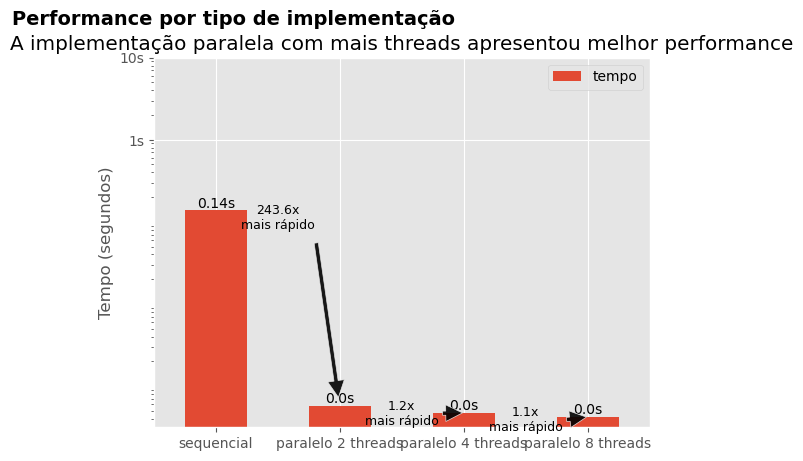

In [15]:
plot_comparacao_implementacoes(tempo_por_implementacao)

### Configuração do hardware utilizado

<table>
  <tr>
    <th>CPU</th>
    <td>Intel Core i5-8250U</td>
  </tr>
  <tr>
    <th>CPU BASE CLOCK</th>
    <td>1.60 GHz</td>
  </tr>
    <tr>
    <th>CPU CACHE</th>
    <td>6 MB Intel® Smart Cache</td>
    </tr>
    <tr>
    <th>MEMÓRIA RAM</th>
    <td>8.0 GB</td>
  </tr>
    <tr>
    <th>SISTEMA OPERACIONAL</th>
    <td>Windows 10 Home v22H2</td>
  </tr>
</table>